[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/kadenze-deeplearning-creative-applications/blob/master/Kadenze_Session_2.ipynb)

In [0]:
#%pylab

In [0]:
import os
import tensorflow as tf
import numpy as np

In [0]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [0]:
plt.style.use('ggplot')

In [0]:
%matplotlib inline

In [6]:
fig = plt.figure(figsize=(10,6))

<IPython.core.display.Javascript object>

In [0]:
ax = fig.gca()

In [0]:
x = np.linspace(-1, 1, 200)

In [0]:
hz = 10

In [0]:
cost = np.sin(hz*x) * np.exp(-x)

In [11]:
ax.plot(x, cost)

In [12]:
ax.set_ylabel('Cost')
ax.set_xlabel('Parameter')

Text(0.5,0,'Parameter')

In [0]:
plt.show();

In [0]:
gradient = np.diff(cost)

In [14]:
gradient

array([-0.24873082, -0.25619419, -0.26092369, -0.26292601, -0.2622352 ,
       -0.25891185, -0.25304186, -0.24473515, -0.23412404, -0.22136147,
       -0.20661904, -0.19008492, -0.17196161, -0.15246364, -0.13181511,
       -0.11024729, -0.08799612, -0.06529976, -0.04239608, -0.01952035,
        0.00309714,  0.02523329,  0.0466743 ,  0.06721764,  0.08667384,
        0.10486822,  0.12164227,  0.13685499,  0.15038393,  0.16212607,
        0.17199848,  0.17993873,  0.18590515,  0.18987682,  0.19185333,
        0.19185446,  0.1899195 ,  0.1861065 ,  0.18049131,  0.17316648,
        0.16423992,  0.1538336 ,  0.14208198,  0.12913042,  0.11513349,
        0.10025325,  0.08465744,  0.06851767,  0.05200765,  0.03530134,
        0.01857126,  0.00198669, -0.0142879 , -0.03009444, -0.04528275,
       -0.05971184, -0.07325123, -0.08578198, -0.09719771, -0.10740543,
       -0.11632614, -0.12389545, -0.13006386, -0.13479701, -0.13807568,
       -0.13989574, -0.14026785, -0.13921706, -0.1367823 , -0.13

In [0]:
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)

In [0]:
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)

In [0]:
init_p = 120 #np.random.randint(len(x)*0.2, len(x)*0.8)

In [0]:
learning_rate = 1.0

In [0]:
for iter_i in range(n_iterations):
    #print(init_p)
    init_p -= int(learning_rate * gradient[init_p])
    #print(init_p)
    ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1)/n_iterations, color=scalar_map.to_rgba(iter_i))

In [0]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

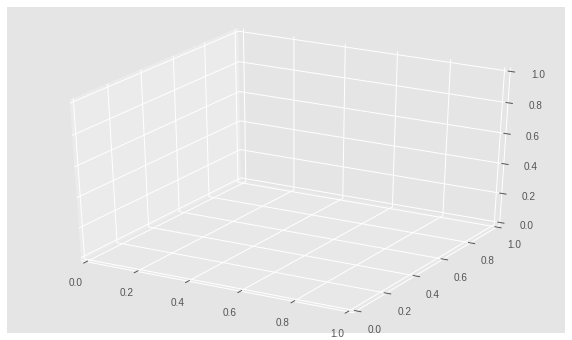

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

In [0]:
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]

In [0]:
X, Y, Z = x, y, np.sin(hz*x) * np.exp(-x) * np.cos(hz*y) * np.exp(-y)

In [34]:
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)

In [0]:
plt.show();

In [0]:
n_obs = 1000

In [0]:
x = np.linspace(-3, 3, n_obs)

In [0]:
y = np.sin(x) + np.random.uniform(-0.5, 0.5, n_obs)

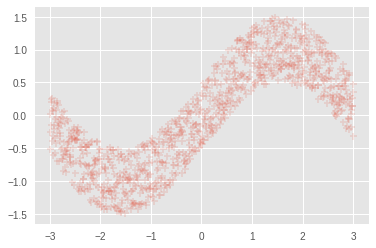

In [39]:
plt.scatter(x, y, alpha=0.15, marker='+')

In [0]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [0]:
sess = tf.InteractiveSession()

In [0]:
n = tf.random_normal([1000]).eval()

(array([  5.,  18.,  71., 194., 268., 243., 126.,  54.,  18.,   3.]),
 array([-3.47418523, -2.76360724, -2.05302925, -1.34245126, -0.63187327,
         0.07870471,  0.7892827 ,  1.49986069,  2.21043868,  2.92101667,
         3.63159466]),
 <a list of 10 Patch objects>)

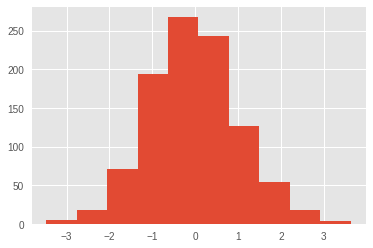

In [45]:
plt.hist(n)

In [0]:
n = tf.random_normal([1000], stddev=0.1).eval()

(array([  7.,  14.,  39.,  84., 194., 259., 208., 127.,  50.,  18.]),
 array([-0.34701383, -0.28524604, -0.22347825, -0.16171046, -0.09994267,
        -0.03817488,  0.02359291,  0.0853607 ,  0.14712849,  0.20889628,
         0.27066407]),
 <a list of 10 Patch objects>)

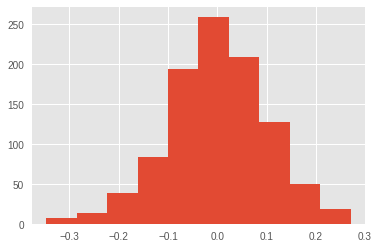

In [47]:
plt.hist(n)

In [0]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

In [0]:
B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')

In [0]:
Y_pred = X * W + B

In [0]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [0]:
cost = distance(Y_pred, tf.sin(X))

In [54]:
cost

<tf.Tensor 'Abs:0' shape=<unknown> dtype=float32>